# Introduction
Welcome! This exercise will contain two sections for you to work on. Each section is separate and will have different datasets. This data was generated in our Human Machine Systems Lab (IE 4522/4523) via two separate exercises, which will comprise the two sections.

There are a million ways to do things in Python! Do not feel like there is one right answer. Google how to do things. Compare alternatives. Figure out what you think is best. Stack Overflow is great. Same as GeeksforGeeks. If you have any questions, send me a message over Slack. Good luck! -- Jordan

# Dots
The first exercise our lab group did was to partake in this online experiment where there were two sides (left/ride) on the screen. Each side had a certain amount of dots, and the user had to click on the side with more dots. Each user did that 60 times for different cases, and the data was all recorded. 

In [46]:
# Packages you might find useful
import pandas as pd
import numpy as np
import scipy as sp

# Visualization/Stat Packages
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [47]:
# Import the data
import pandas as pd
dots_jord = pd.read_csv('dots/Jordan_Dots.csv')
dots_alex = pd.read_csv('dots/Alex_Dots.csv')

In [48]:
# First 5 rows
dots_jord.head()

,Experiment,SubjectID,Schedule,TestName,MPoint,SessionName,SessionID,LaunchTime,StartTime,ResultTime,...,block,task,trial,dots,delta,mode,dir,response,key,rt
0,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,1,20,5,same,right,correct,right,901
1,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,2,20,4,same,left,incorrect,right,985
2,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,3,20,4,same,right,correct,right,792
3,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,4,30,2,same,left,correct,left,676
4,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,5,30,1,same,left,correct,left,702


In [49]:
# Last 5 rows
dots_alex.tail()

,Experiment,SubjectID,Schedule,TestName,MPoint,SessionName,SessionID,LaunchTime,StartTime,ResultTime,...,block,task,trial,dots,delta,mode,dir,response,key,rt
55,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,56,20,3,same,left,correct,left,2919
56,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,57,30,1,same,right,correct,right,5842
57,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,58,20,3,same,right,correct,right,2322
58,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,59,30,1,same,right,correct,right,8125
59,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,60,10,1,same,right,correct,right,2872


In [50]:
frames = [dots_alex, dots_jord]
dots = pd.concat(frames)
dots = dots.reset_index(drop=True)

dots

,Experiment,SubjectID,Schedule,TestName,MPoint,SessionName,SessionID,LaunchTime,StartTime,ResultTime,...,block,task,trial,dots,delta,mode,dir,response,key,rt
0,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,1,20,2,same,right,correct,right,2899
1,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,2,20,3,same,left,correct,left,1707
2,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,3,30,3,same,right,correct,right,1284
3,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,4,10,4,same,left,correct,left,1296
4,Lab 4 Spring 2022 Blue Lab 1A,_5583,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5583_20220224083337_16968,2/24/2022 8:21,2/24/2022 8:26,2/24/2022 8:33,...,1,rdots,5,20,1,same,right,correct,right,6959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,56,10,1,same,left,correct,left,581
116,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,57,10,2,same,left,correct,left,693
117,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,58,30,4,same,right,incorrect,left,728
118,Lab 4 Spring 2022 Blue Lab 1A,_5584,Schedule 1,Lab 4 Spring 2022 Blue Lab 1A Random Dots,1,Random Dots,_5584_20220224083126_16969,2022-02-24 08:19:39,2022-02-24 08:26:57,2022-02-24 08:31:26,...,1,rdots,59,10,1,same,right,correct,right,558


## Problem 1
Get the unique values for the 'SubjectID'. Then replace those values with the following names. After the replacement, get the unique values again to doublecheck your work.

- '_5583' with 'Alex'
- '_5584' with 'Jordan'

In [51]:
# Get unique values
dots['SubjectID'].unique()

array(['_5583', '_5584'], dtype=object)

In [52]:
# Change Subject ID to Names
dots['SubjectID'][dots['SubjectID'] == "_5583"] = "Alex"
dots['SubjectID'][dots['SubjectID'] == "_5584"] = "Jordan"

<ipython-input-52-a9c561822431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dots['SubjectID'][dots['SubjectID'] == "_5583"] = "Alex"
<ipython-input-52-a9c561822431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dots['SubjectID'][dots['SubjectID'] == "_5584"] = "Jordan"


In [53]:
# Get unique values again to doublecheck
dots['SubjectID'].unique()

array(['Alex', 'Jordan'], dtype=object)

## Problem 2
Create the following data visualizations. Label your graphs accordingly with proper titles.

1. Boxplot of the response time (rt) vs the response column (correct/incorrect)
2. Scatterplot of all response times (rt) vs delta, grouped by SubjectID
3. Regression plot of Alex's response time (rt) vs delta (the number of extra dots). The regression plot should show the trendline.
    - If you're feeling risky, run a linear regression, print the results, and get the Pearson correlation value.

You can do each visual separately. However, if you want to challenge yourself, then try and produce all 3 visuals in 1 cell, where the visuals go in 1 row. 

I would recommend either **Seaborn** and/or **Matplotlib** for data visualization libraries. Use **scipy** and/or **statsmodels** for stats/regression.

[Text(0.5, 1.0, "Alex's Dot Data")]

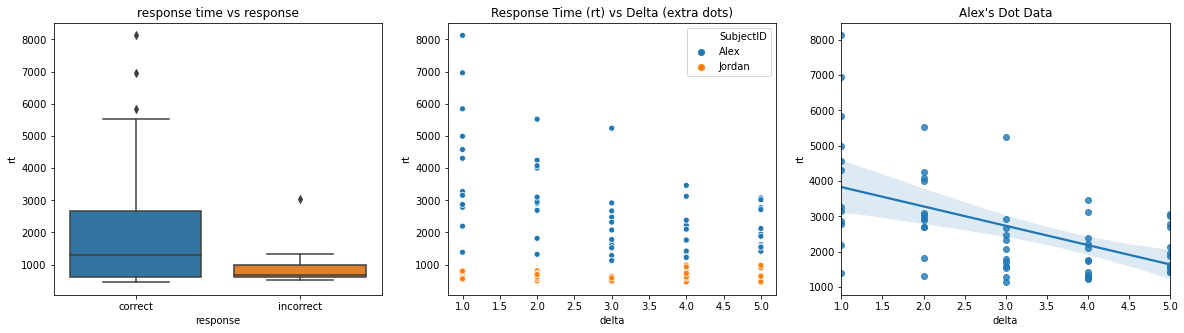

In [54]:
# Visualization/Stat Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set up layout
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))

# Boxplot
sns.boxplot(data=dots, x="response", y="rt", ax=axs[0]).set(title="response time vs response")

# Scatter plot of all response times
sns.scatterplot(data=dots, x="delta", y="rt", hue="SubjectID", ax=axs[1]).set(title="Response Time (rt) vs Delta (extra dots)")

# Regression plot of Alex's response time vs delta
sns.regplot(data=dots_alex, x="delta", y="rt", ax=axs[2]).set(title="Alex's Dot Data")

In [55]:
# Regression results for Alex's data
x_train = sm.add_constant(dots_alex['delta'])
lr = sm.OLS(dots_alex['rt'], x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     23.14
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.11e-05
Time:                        11:25:57   Log-Likelihood:                -511.78
No. Observations:                  60   AIC:                             1028.
Df Residuals:                      58   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4374.9167    377.229     11.597      0.000    3619.810    5130.023
delta       -547.0833    113.739     -4.810      0.000    -774.757    -319.410
==============================================================================
Omnibus:                       14.311   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.592
Skew:                           1.011   Prob(JB):                     0.000250
Kurtosis:                       4.596   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Pearson Correlation for Alex's Data
sp.stats.pearsonr(dots_alex['delta'], dots_alex['rt'])[0]

-0.5339953451833437

## Problem 3
Create 3 histograms of the response time distributions. 
1. Histogram of all of the dot data.
2. Histogram of Alex's data. 
3. Histogram of Jordan's data. 

Try and produce all 3 visuals in 1 cell as well, well the visuals go in 1 row.

(array([21., 10., 16.,  2.,  5.,  2.,  2.,  0.,  1.,  1.]),
 array([1127. , 1826.8, 2526.6, 3226.4, 3926.2, 4626. , 5325.8, 6025.6,
        6725.4, 7425.2, 8125. ]),
 <a list of 10 Patch objects>)

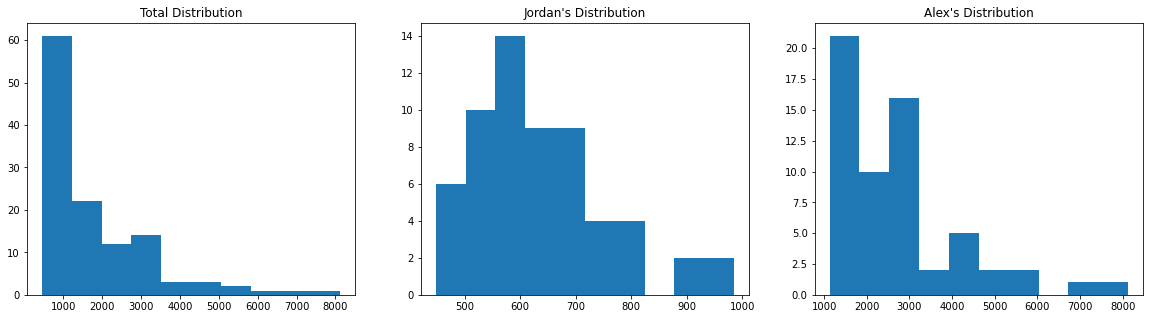

In [23]:
# Histograms
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))

import pylab as pl

# Title and axs
axs[0].set_title("Total Distribution")
axs[0].hist(dots['rt'])

axs[1].set_title("Jordan's Distribution")
axs[1].hist(dots_jord['rt'])

axs[2].set_title("Alex's Distribution")
axs[2].hist(dots_alex['rt'])

# Rotation
The second exercise we did was similar, but with some key differences. A symbol (4, 2, F, R) would appear on the screen. It would be rotated n degrees, and the user had to determine whether the symbol was a normal image or a mirorred image. Each user did that 60 times for different cases, and the data was all recorded. Response time, symbol, angle, and response correctness were all recorded.

Since more sample code was provided for the first section, I will leave this section with no sample code.

## Problem 1
1. Import the data in the **mirror** folder (Alex_Rotation.csv and Jordan_Rotation.csv) as **rotate_alex** and **rotate_jord**. Combine the dataframes as a new dataframe called **rotate** (don't forget to reset the index -- see the dots section, if you don't you will run into certain problems depending on what you try and do with the data).
2. Change the SubjectIDs the same way you changed them for the Dots section ("_5583" to "Alex" and "_5584" to "Jordan")

In [57]:
# Import the data
rotate_jord = pd.read_csv('mirror/Jordan_Rotation.csv')
rotate_alex = pd.read_csv('mirror/Alex_Rotation.csv')

frames = [rotate_jord, rotate_alex]
rotate = pd.concat(frames)

rotate = rotate.reset_index(drop=True)
rotate

,Experiment,SubjectID,Schedule,TestName,MPoint,SessionName,SessionID,LaunchTime,StartTime,ResultTime,...,Remark,block,task,trial,symbol,image,angle,response,key,rt
0,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5584,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5584_20220224092145_17028,2/24/2022 9:11,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,1,R,mirrored,240,correct,mirrored,2434.2
1,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5584,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5584_20220224092145_17028,2/24/2022 9:11,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,2,2,regular,120,incorrect,mirrored,1353.3
2,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5584,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5584_20220224092145_17028,2/24/2022 9:11,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,3,2,regular,180,correct,regular,2340.7
3,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5584,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5584_20220224092145_17028,2/24/2022 9:11,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,4,F,mirrored,60,correct,mirrored,1137.5
4,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5584,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5584_20220224092145_17028,2/24/2022 9:11,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,5,2,mirrored,60,incorrect,regular,1590.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5583,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5583_20220224092157_17027,2/24/2022 9:08,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,44,R,mirrored,60,correct,mirrored,1059.0
44,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5583,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5583_20220224092157_17027,2/24/2022 9:08,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,45,F,mirrored,60,correct,mirrored,1062.0
45,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5583,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5583_20220224092157_17027,2/24/2022 9:08,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,46,R,mirrored,240,correct,mirrored,2079.0
46,Lab 4 Spring 2022 Blue Lab 1A Mental Rotation,_5583,Schedule 1,Mental Rotation,1,Lab 4 Spring 2022 Blue Lab 1A,_5583_20220224092157_17027,2/24/2022 9:08,2/24/2022 9:18,2/24/2022 9:21,...,NaN,1,mrotat,47,4,regular,60,correct,regular,1095.0


In [58]:
# Change
rotate['SubjectID'][rotate['SubjectID'] == "_5583"] = "Alex"
rotate['SubjectID'][rotate['SubjectID'] == "_5584"] = "Jordan"

<ipython-input-58-00f945466daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotate['SubjectID'][rotate['SubjectID'] == "_5583"] = "Alex"
<ipython-input-58-00f945466daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotate['SubjectID'][rotate['SubjectID'] == "_5584"] = "Jordan"


## Problem 2
1. Plot the response time (rt) vs the angle, grouped by the SubjectID (use sns.lmplot). Use .set() to change the axis labels to "response time" and "Degrees of Rotation". This function should generate 2 plots.
2. Comment your thoughts.
3. Get the Pearson correlation value.

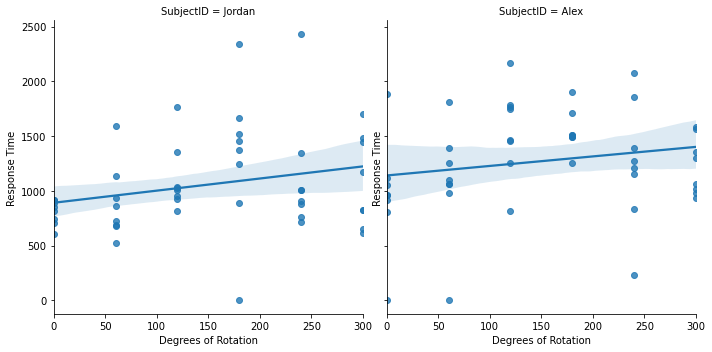

In [59]:
# Response Time
sns.lmplot(x="angle", y="rt", col="SubjectID", data=rotate).set(xlabel="Degrees of Rotation", ylabel="Response Time")

Looks like there is a very slight positive correlation between response time and degrees of rotation for both subjects. You could argue that there's not much correlation. The Pearson Correlation is 0.218, which indicates that slight positive correlation value. 

In [60]:
# Pearson Correlation
sp.stats.pearsonr(rotate['angle'], rotate['rt'])[0]

0.21793572428243363

## Problem 3

This is a long one. These parts are all connected though, so pay close attention to that.

1. First, make some substitutions. Substitute the following for the symbol column.
    - replace "F" and "R" with "letter"
    - replace "4" and "2" with "number"
    
    
2. Generate the following visuals. See if you can produce both visuals in one cell.
    - Histogram of response time (all data)
    - Boxplot of the response time vs the symbol


3. Using a paired t-test, calculate and compare the average reaction times for letters vs. numbers using the variables **symbol** and **rt**, and show your results. What do the results of this test mean? Does the results of this test back up the data visualizations generated in part 2?

A paired t-test is a "statistical test that compares the means and standard deviations of two related samples". Below are the hypotheses.
- Null Hypothesis ($H_{0})$: There is no significant difference between the means of two related groups.
- Alternative Hypothesis ($H_{1})$: There is a significant difference between the means of two related groups

The variance is assumed to be unequal between groups. There are four assumptions that must be met.

1. The dependent variable is normally distributed
2. Independently sampled observations
3. Dependent variable measured in ratios or intervals 
4. Independent variables have two related or matched groups




In [61]:
# Unique Symbols
rotate['symbol'].unique()

array(['R', '2', 'F', '4'], dtype=object)

In [62]:
# Substitute
rotate.loc[rotate['symbol'].isin(["F", "R"]), 'symbol'] = "letter"
rotate.loc[rotate['symbol'].isin(["4", "2"]), 'symbol'] = "number"

# Count Values for Numbers and Letters
rotate['symbol'].unique()

array(['letter', 'number'], dtype=object)

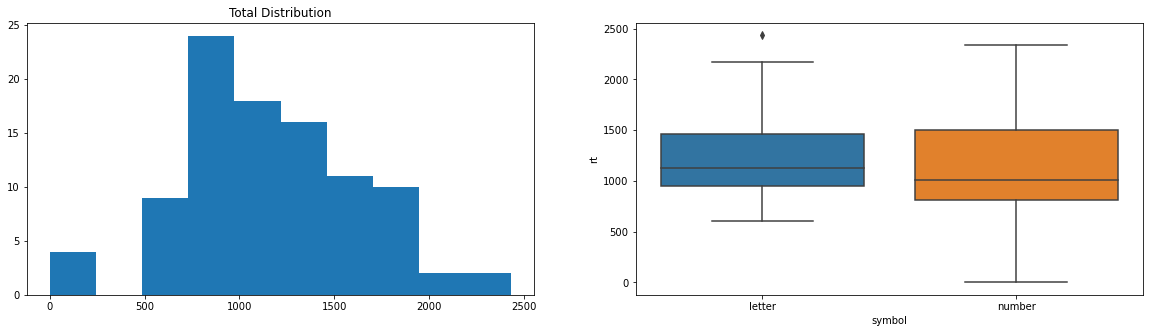

In [63]:
# Set up subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))

# Title and axs
axs[0].set_title("Total Distribution")
axs[0].hist(rotate['rt'])

# Boxplot to show distribution
sns.boxplot(data=rotate, y="rt", x="symbol", ax=axs[1])

In [41]:
# Paired T-test
sp.stats.ttest_rel(rotate['rt'][rotate['symbol'] == "letter"], rotate['rt'][rotate['symbol'] == "number"])

Ttest_relResult(statistic=1.3521598767196947, pvalue=0.18279503980140782)

Based on the test statistic (1.35) and the corresponding p-value (0.18), since the p-value is greater than the standard alpha value of 0.05, we fail to reject the null hypothesis (not enough evidence) which states that there is no significant difference between the means of two related groups.

As a result, we can conclude that there is no statistical significant difference between the mean of the two groups, which makes sense because the symbol (number/letter) did not make the test easier or more difficult.